<a href="https://colab.research.google.com/github/sitikharomah/Tugas-Besar-Data-Mining/blob/main/DataMining_2_Model_selada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PERSIAPAN DATA

In [ ]:
data_dir = "/content/drive/MyDrive/DATASET SELADA"  # Folder utama berisi 3 folder kelas
img_size = 224
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    brightness_range=[0.8,1.2],
    fill_mode='nearest',
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 783 images belonging to 3 classes.
Found 194 images belonging to 3 classes.


# MODEL DENSENET121

In [4]:
from tensorflow.keras.applications import DenseNet121

base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_densenet.trainable = False

model_densenet = Sequential([
    base_densenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_densenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model DenseNet121")
history_densenet = model_densenet.fit(train_gen, epochs=50, validation_data=val_gen)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Model DenseNet121


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 602s 12s/step - accuracy: 0.4163 - loss: 1.1265 - val_accuracy: 0.7577 - val_loss: 0.5553
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.7952 - loss: 0.5085 - val_accuracy: 0.8402 - val_loss: 0.4007
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.9030 - loss: 0.3065 - val_accuracy: 0.8505 - val_loss: 0.3630
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.9271 - loss: 0.2309 - val_accuracy: 0.8763 - val_loss: 0.2730
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step - accuracy: 0.9631 - loss: 0.1675 - val_accuracy: 0.8660 - val_loss: 0.2525
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.9742 - loss: 0.1387 - val_accuracy: 0.8763 - val_loss: 0.2570
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.9725 - loss: 0.1211 - val_accuracy: 0.8660 - val_loss: 0.2886
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.9763 - loss: 0.0901 - val_accuracy: 0.9021 - 

In [8]:
base_densenet.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

# MODEL MOBILENETV2

In [5]:
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_mobilenet.trainable = False

model_mobilenet = Sequential([
    base_mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_mobilenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model MobileNetV2")
history_mobilenet = model_mobilenet.fit(train_gen, epochs=50, validation_data=val_gen)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Model MobileNetV2
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5632 - loss: 0.9991 - val_accuracy: 0.8608 - val_loss: 0.3879
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9431 - loss: 0.2557 - val_accuracy: 0.8918 - val_loss: 0.2593
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.9594 - loss: 0.1548 - val_accuracy: 0.8969 - val_loss: 0.2358
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9746 - loss: 0.0977 - val_accuracy: 0.8763 - val_loss: 0.2091
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9891 - loss: 0.0641 - val_accuracy: 0.9175 - val_loss: 0.1684
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9805 - loss: 0.0629 - val_accuracy: 0.9330 - val_loss: 0.1605
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9887 - loss: 0.0532 - val_accuracy: 0.9433 - val_loss: 0.1230
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━

In [9]:
base_mobilenet.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

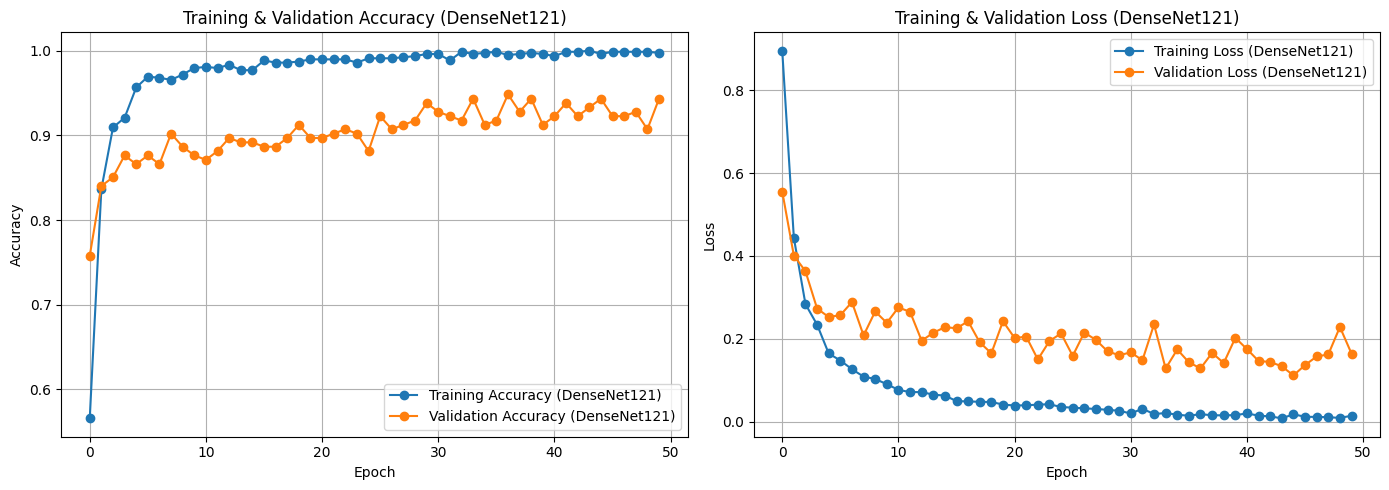

In [6]:
# grafik loss/accuracy training - validation for DenseNet121
plt.figure(figsize=(14, 5))

# Akurasi DenseNet121
plt.subplot(1, 2, 1)
plt.plot(history_densenet.history['accuracy'], label='Training Accuracy (DenseNet121)', marker='o')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy (DenseNet121)', marker='o')
plt.title('Training & Validation Accuracy (DenseNet121)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss DenseNet121
plt.subplot(1, 2, 2)
plt.plot(history_densenet.history['loss'], label='Training Loss (DenseNet121)', marker='o')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss (DenseNet121)', marker='o')
plt.title('Training & Validation Loss (DenseNet121)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



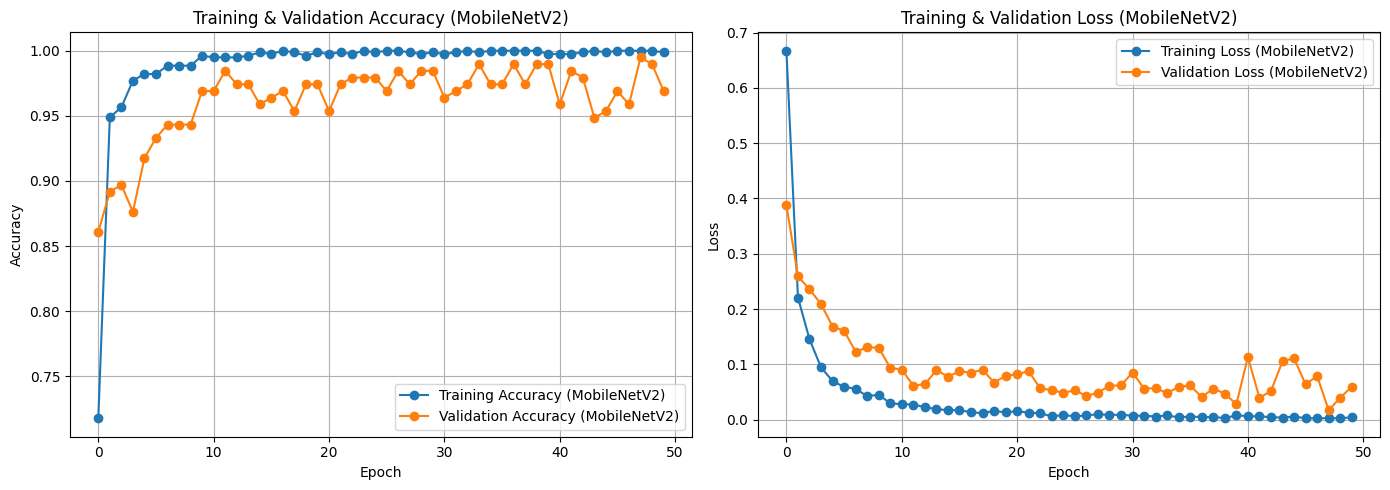

In [7]:
# Grafik loss/accuracy training - validation for MobileNetV2
plt.figure(figsize=(14, 5))

# Akurasi MobileNetV2
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy (MobileNetV2)', marker='o')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy (MobileNetV2)', marker='o')
plt.title('Training & Validation Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss MobileNetV2
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss (MobileNetV2)', marker='o')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss (MobileNetV2)', marker='o')
plt.title('Training & Validation Loss (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# VISUALISASI KELAS

In [10]:
class_labels = list(train_gen.class_indices.keys())

print("\nKelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")


Kelas yang terdeteksi:
0: BUSUK_AKAR
1: BUSUK_BATANG
2: MATA_KODOK


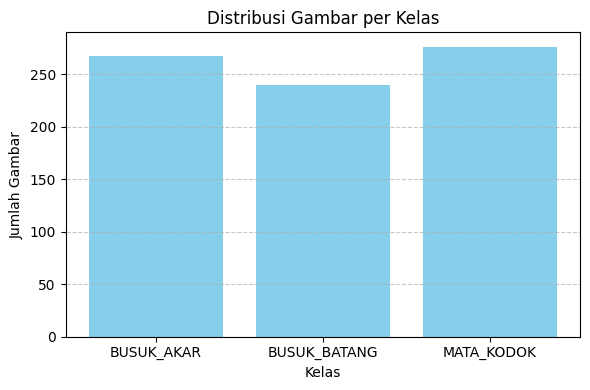


Kelas yang terdeteksi:
0: BUSUK_AKAR
1: BUSUK_BATANG
2: MATA_KODOK


In [11]:
# Tambahkan visualisasi distribusi jumlah gambar per kelas
from collections import Counter
label_counts = Counter(train_gen.classes)
plt.figure(figsize=(6,4))
plt.bar([class_labels[i] for i in label_counts.keys()], label_counts.values(), color='skyblue')
plt.title("Distribusi Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# ===========================
class_labels = list(train_gen.class_indices.keys())

print("\nKelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")

# CONFUSION MATRIX & KLASIFIKASI

##DenseNet121

13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step

Classification Report (DenseNet121):
              precision    recall  f1-score   support

  BUSUK_AKAR       1.00      1.00      1.00        66
BUSUK_BATANG       1.00      0.80      0.89        60
  MATA_KODOK       0.85      1.00      0.92        68

    accuracy                           0.94       194
   macro avg       0.95      0.93      0.94       194
weighted avg       0.95      0.94      0.94       194



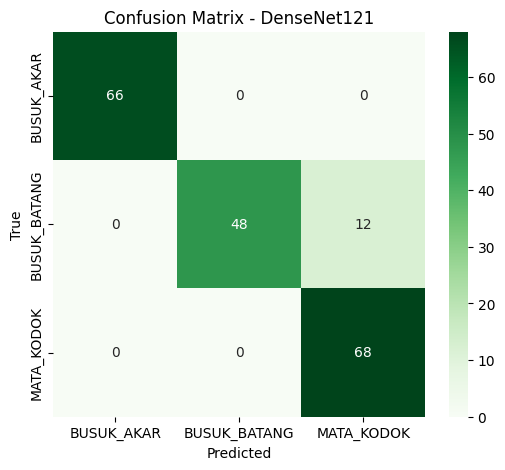

In [12]:
# DenseNet121
pred_densenet = model_densenet.predict(val_gen)
y_pred_densenet = np.argmax(pred_densenet, axis=1)
y_true = val_gen.classes

print("\nClassification Report (DenseNet121):")
print(classification_report(y_true, y_pred_densenet, target_names=class_labels))

cm2 = confusion_matrix(y_true, y_pred_densenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


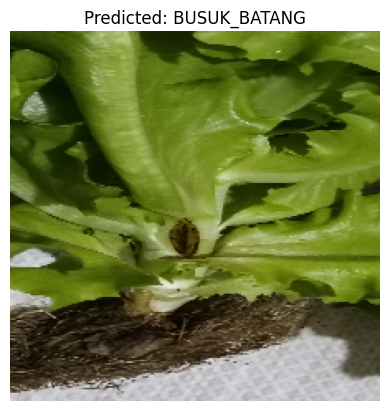

In [16]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214851_01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


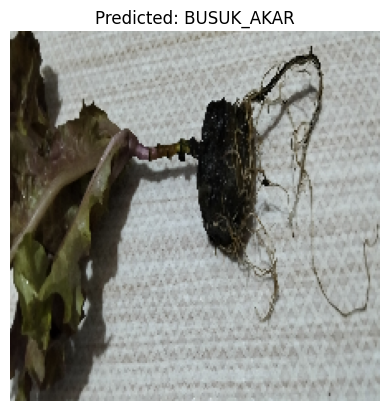

In [17]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_AKAR/IMG20250115204154_01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


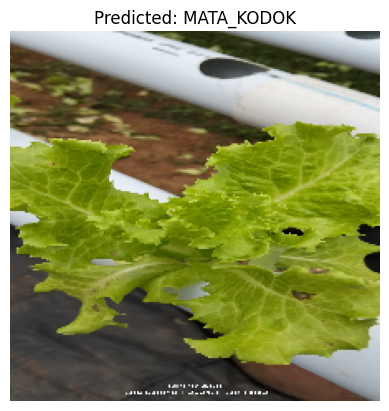

In [18]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/MATA_KODOK/IMG20241130165243.jpg")

13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step

Classification Report (MobileNetV2):
              precision    recall  f1-score   support

  BUSUK_AKAR       1.00      1.00      1.00        66
BUSUK_BATANG       1.00      0.88      0.94        60
  MATA_KODOK       0.91      1.00      0.95        68

    accuracy                           0.96       194
   macro avg       0.97      0.96      0.96       194
weighted avg       0.97      0.96      0.96       194



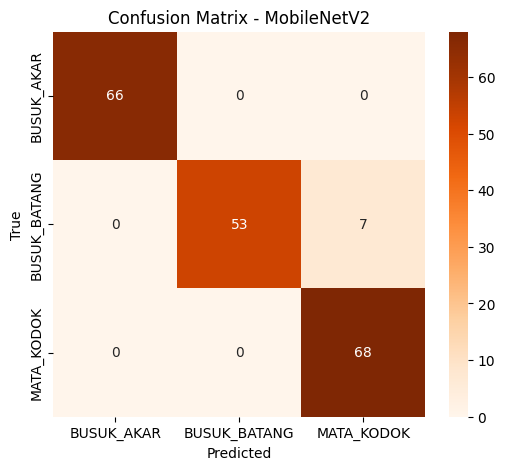

In [13]:
# MobileNetV2
pred_mobilenet = model_mobilenet.predict(val_gen)
y_pred_mobilenet = np.argmax(pred_mobilenet, axis=1)
y_true = val_gen.classes

print("\nClassification Report (MobileNetV2):")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

cm3 = confusion_matrix(y_true, y_pred_mobilenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


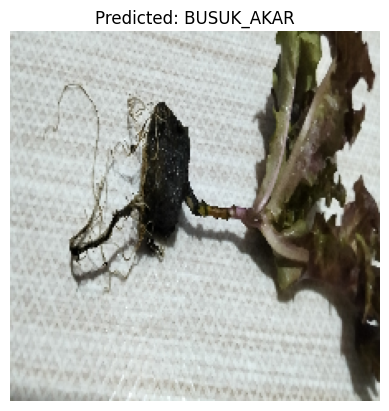

In [19]:
predict_image("model_mobilenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_AKAR/IMG20250115204054.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


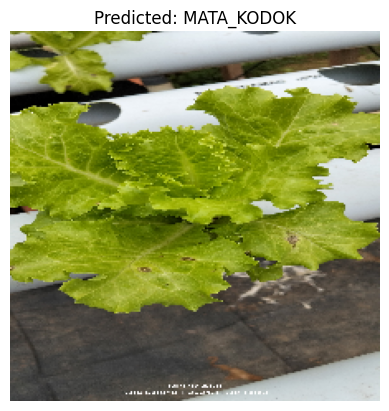

In [20]:
predict_image("model_mobilenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/MATA_KODOK/IMG20241130165357.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


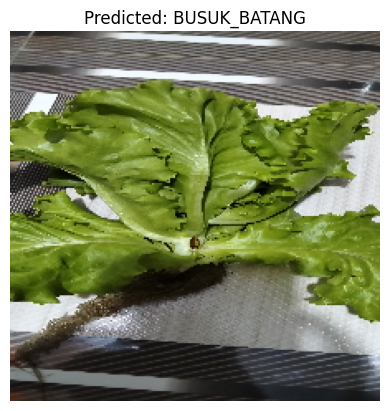

In [21]:
predict_image("model_mobilenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214000.jpg")

# SIMPAN MODEL

In [14]:
model_densenet.save("model_densenet_selada.h5")
model_mobilenet.save("model_mobilenet_selada.h5")

# PREDIKSI CITRA TUNGGAL

In [25]:
def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [30]:
def show_image_samples(gen):
    test_dict=train_gen.class_indices
    classes=list(test_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='purple', fontsize=16)
        plt.axis('off')
    plt.show()

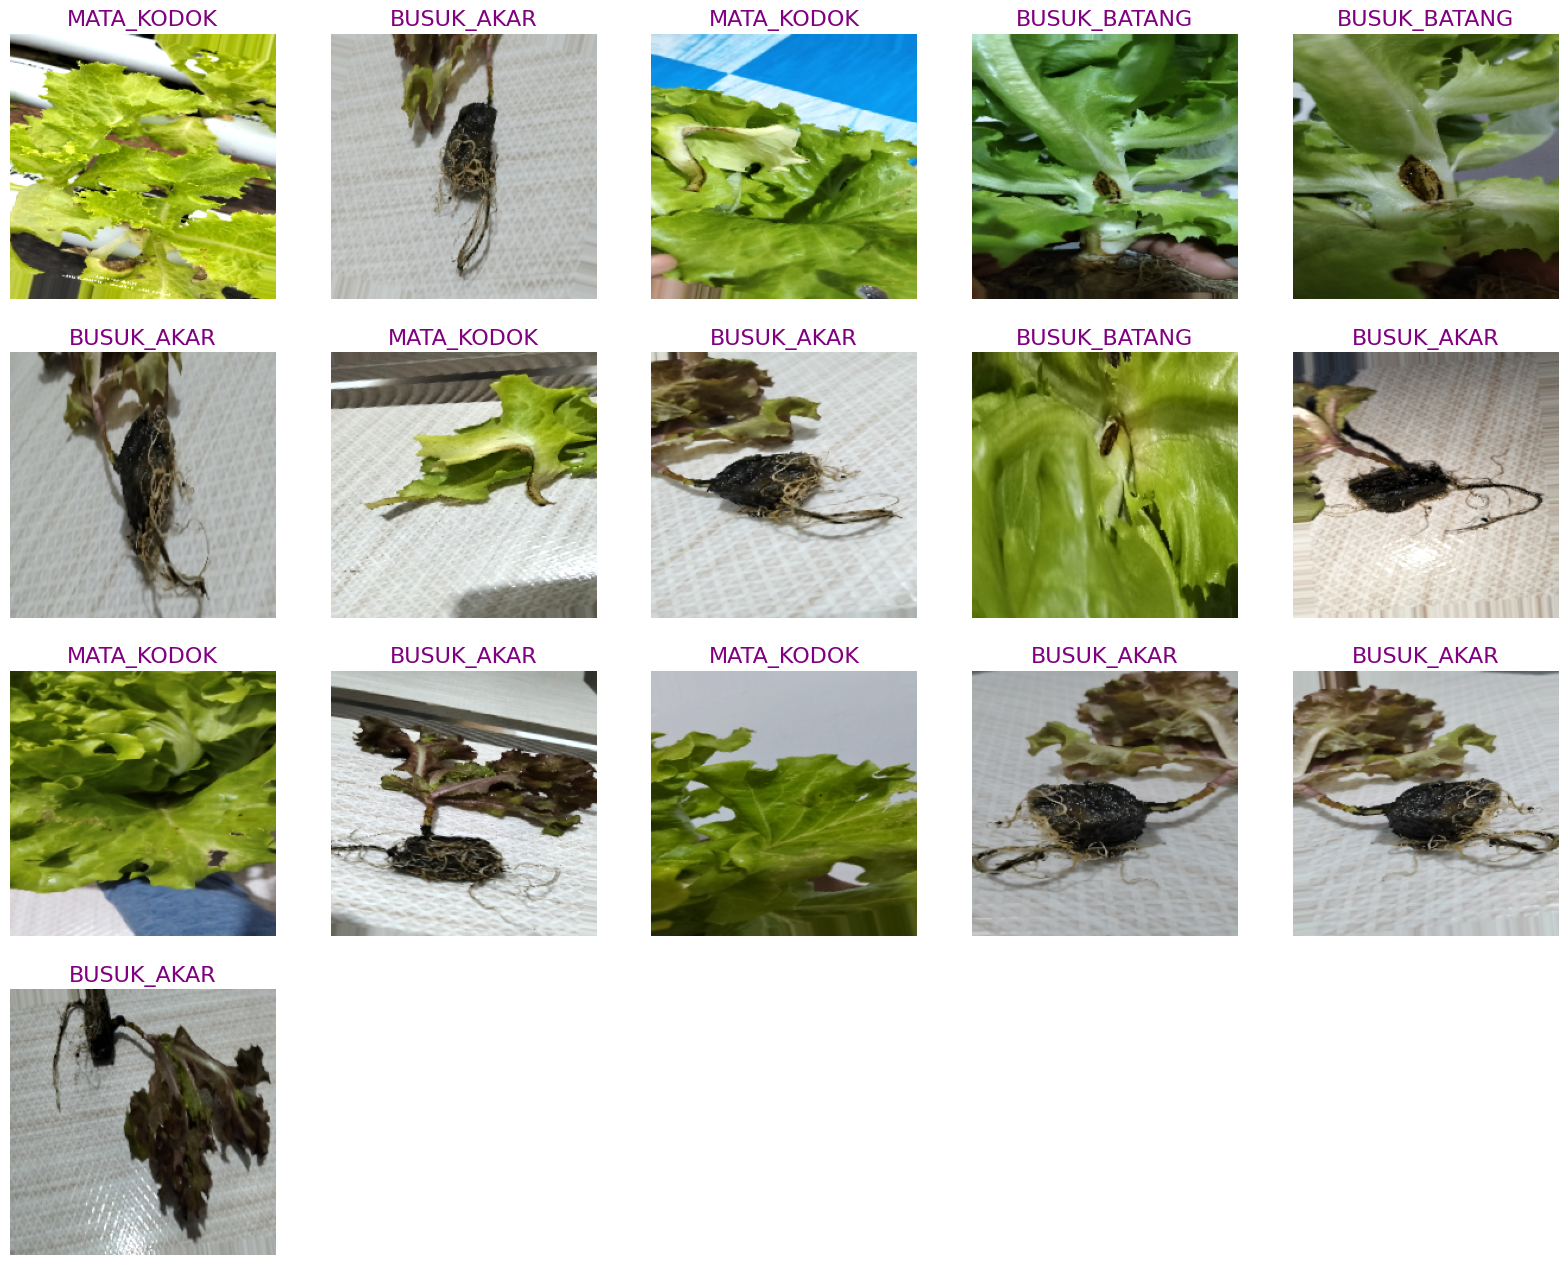

In [31]:
show_image_samples(train_gen)